In [3]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import re
%matplotlib inline
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout


In [4]:
import zipfile

zip_path = r"C:\Users\udhay\Downloads\fake-news.zip"

with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open('train.csv') as f:  
        df = pd.read_csv(f)

In [5]:
df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df['text'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It By Darrell Lucus on October 30, 2016 Subscribe Jason Chaffetz on the stump in American Fork, Utah ( image courtesy Michael Jolley, available under a Creative Commons-BY license) \nWith apologies to Keith Olbermann, there is no doubt who the Worst Person in The World is this week–FBI Director James Comey. But according to a House Democratic aide, it looks like we also know who the second-worst person is as well. It turns out that when Comey sent his now-infamous letter announcing that the FBI was looking into emails that may be related to Hillary Clinton’s email server, the ranking Democrats on the relevant committees didn’t hear about it from Comey. They found out via a tweet from one of the Republican committee chairmen. \nAs we now know, Comey notified the Republican chairmen and Democratic ranking members of the House Intelligence, Judiciary, and Oversight committees that his agency was reviewing emai

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
df=df.drop(['id','title','author'], axis=1)

In [9]:
df=df.dropna(axis=0)

In [10]:
df['clean_news']=df['text'].str.lower()

In [11]:
df['clean_news']=df['clean_news'].str.replace('[^A-Za-z0-0\s]','')
df['clean_news']=df['clean_news'].str.replace('\n','')
df['clean_news']=df['clean_news'].str.replace('\s+','')

In [12]:
df['clean_news']

0        house dem aide: we didn’t even see comey’s let...
1        ever get the feeling your life circles the rou...
2        why the truth might get you fired october 29, ...
3        videos 15 civilians killed in single us airstr...
4        print an iranian woman has been sentenced to s...
                               ...                        
20795    rapper t. i. unloaded on black celebrities who...
20796    when the green bay packers lost to the washing...
20797    the macy’s of today grew from the union of sev...
20798    nato, russia to hold parallel exercises in bal...
20799      david swanson is an author, activist, journa...
Name: clean_news, Length: 20761, dtype: object

In [13]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['clean_news']=df['clean_news'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop])) 

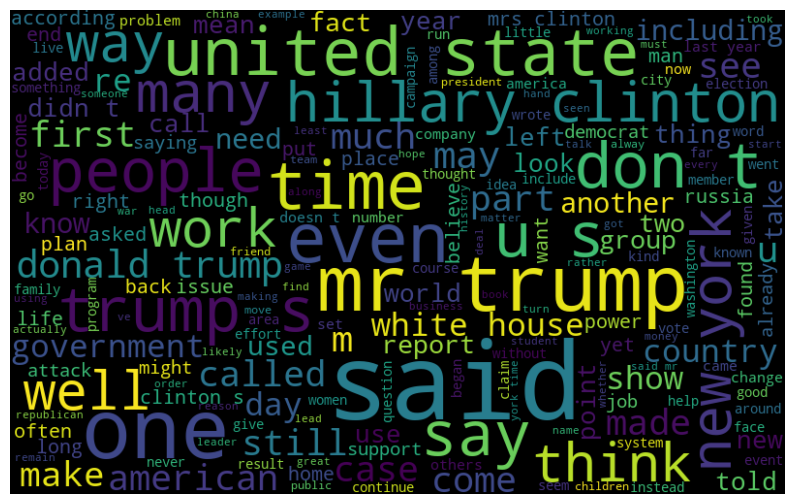

In [14]:
from wordcloud import WordCloud
all_words=' '.join([text for text in df['clean_news']])
wordcloud=WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)  

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

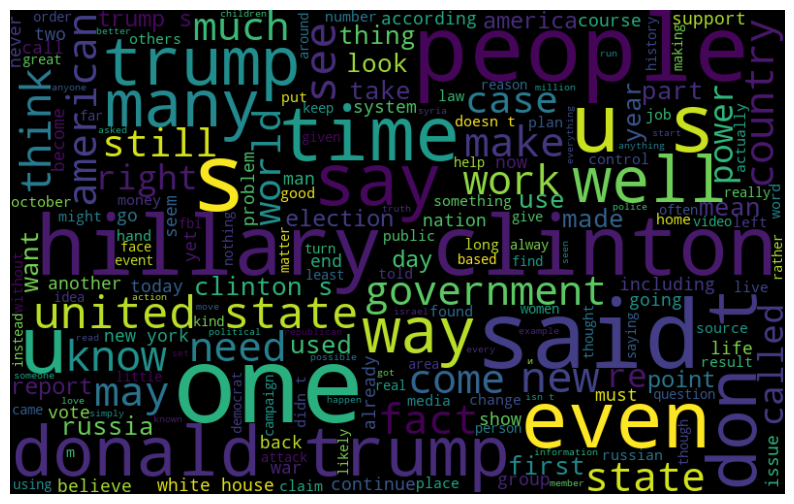

In [15]:

all_words=' '.join([text for text in df['clean_news'][df['label']==1]])
wordcloud=WordCloud(height=500, width=800, random_state=21, max_font_size=110).generate(all_words) 

plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

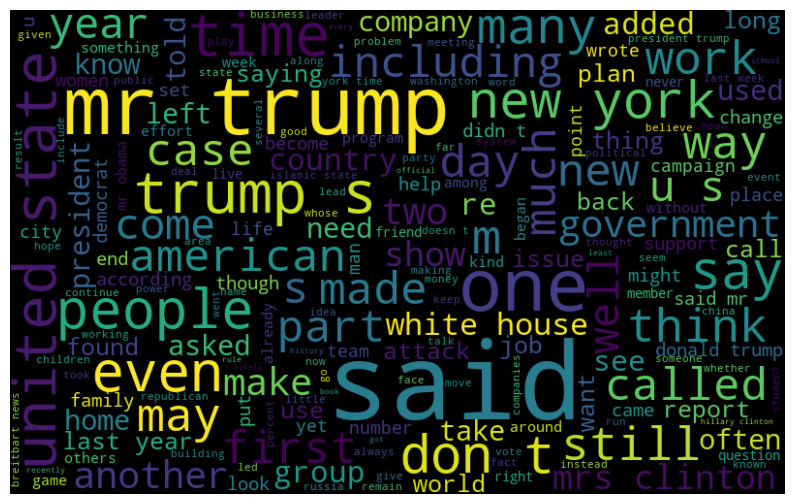

In [16]:
all_words=' '.join( text for text in df['clean_news'][df['label']==0])
worldcloud=wordcloud=WordCloud(height=500, width=800, random_state=21, max_font_size=110).generate(all_words)   

plt.figure(figsize=(10,7))  
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()  

In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [18]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['clean_news'])
word_index = tokenizer.word_index
vocab_size = len(word_index)
vocab_size

239494

In [19]:
sequences = tokenizer.texts_to_sequences(df['clean_news'])
padded_seq = pad_sequences(sequences, maxlen=500, padding='post', truncating='post')


In [20]:
import zipfile

zip_path = r"C:\Users\udhay\Downloads\glove.6B (1).zip"
extract_path = r"C:\Users\udhay\Downloads\glove"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete!")


Extraction complete!


In [21]:
glove_path = glove_path = r"C:\Users\udhay\Downloads\glove.6B (1)\glove.6B.100d.txt"


with open(glove_path, encoding="latin-1") as f:
    for _ in range(5):
        print(f.readline())



the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14172 0.21939 0.58505 -0.52158

In [22]:
import os

# Check if the file exists before opening
if not os.path.exists(glove_path):
    print(f"File not found: {glove_path}")
else:
    print("File found! Proceeding with loading embeddings...")

    embedding_index = {}
    with open(glove_path, encoding="utf-8") as f:
        for line in f:
            values = line.split()
            word = values[0]  # First value is the word
            coefs = np.asarray(values[1:], dtype="float32")  # Convert rest to float
            embedding_index[word] = coefs

    print(f"Loaded {len(embedding_index)} word vectors!")


File found! Proceeding with loading embeddings...
Loaded 400000 word vectors!


In [23]:
# create embedding matrix
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [24]:

with open(glove_path, encoding="latin-1") as f:
    for line in f:
        values = line.strip().split()
        if len(values) != 101:  # 1 word + 100 numbers
            print(f"Skipping bad line: {line[:50]}...")
            continue  
        word = values[0]
        try:
            coefs = np.asarray(values[1:], dtype="float32")
            embedding_index[word] = coefs
        except ValueError:
            print(f"Skipping invalid line: {line[:50]}...")

print(f"Loaded {len(embedding_index)} word vectors!")


Skipping bad line: nguyá»n -0.24928 -0.48798 -0.38414 0.040918 -0.10...
Skipping bad line: dÄbrowa -0.6339 -1.4172 0.26389 0.51266 0.76551 1...
Skipping bad line: â -0.28535 0.59318 -0.98323 1.4728 0.25745 0.411...
Skipping bad line: elblÄg -0.58891 -1.3525 0.9013 0.0088698 0.94743 ...
Skipping bad line: hoÃ ng 0.37187 -0.85244 -0.48689 0.63181 -0.52983 ...
Skipping bad line: sÄcz -0.98123 -1.0263 0.92437 1.2887 0.83576 0.35...
Skipping bad line: â 0.086468 0.22498 -0.49511 1.1501 0.2678 0.8880...
Skipping bad line: vis-Ã -vis 0.15734 -0.7086 0.19857 0.27189 0.14769...
Skipping bad line: thÃ nh 0.083911 -0.25622 -0.32735 0.88927 0.05999 ...
Skipping bad line: ÅlÄskie 0.36869 -0.25315 1.9093 1.5944 0.51321 -...
Skipping bad line: dÄbrÃ³wka -0.13608 -0.67417 0.79444 0.45019 0.661...
Skipping bad line: ÅlÄski 0.13271 -0.77967 1.8736 0.68021 0.3274 0....
Skipping bad line: wÄgrowiec -0.66981 -0.40435 0.99944 1.1988 0.8100...
Skipping bad line: ÅlÄska -0.58229 -1.162 1.4409 

In [25]:
embedding_matrix = np.zeros((vocab_size+1, 100))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_seq, df['label'], test_size=0.2, random_state=42)    

In [27]:
from keras.layers import LSTM,Dropout,Dense,Embedding   
model = Sequential([
    Embedding(vocab_size+1, 100, input_length=500, weights=[embedding_matrix], trainable=False),
    LSTM(100, return_sequences=True),
    Dropout(0.2),
    LSTM(100),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
history=model.fit(X_train, y_train, epochs=10,batch_size=256, validation_data=(X_test, y_test)) 

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 249s 4s/step - accuracy: 0.6297 - loss: 0.6456 - val_accuracy: 0.6345 - val_loss: 0.6305
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 299s 4s/step - accuracy: 0.6880 - loss: 0.6085 - val_accuracy: 0.5468 - val_loss: 0.6956
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 269s 4s/step - accuracy: 0.6079 - loss: 0.6522 - val_accuracy: 0.6540 - val_loss: 0.5818
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 271s 4s/step - accuracy: 0.6859 - loss: 0.5488 - val_accuracy: 0.6547 - val_loss: 0.6616
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 290s 4s/step - accuracy: 0.6691 - loss: 0.5660 - val_accuracy: 0.6547 - val_loss: 0.5622
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 310s 5s/step - accuracy: 0.6942 - loss: 0.5538 - val_accuracy: 0.6205 - val_loss: 0.6584
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 291s 4s/step - accuracy: 0.6261 - loss: 0.6578 - val_accuracy: 0.6118 - val_loss: 0.6637
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 502s 8s/step - accuracy: 0.6141 - loss: 0.6424 - val_accuracy: 0.7103 - v

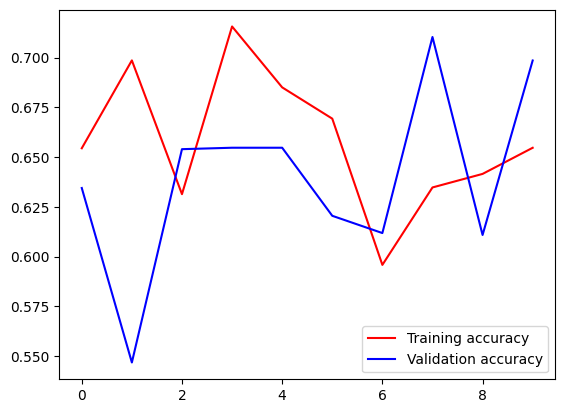

In [30]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))
plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.legend()
plt.show()

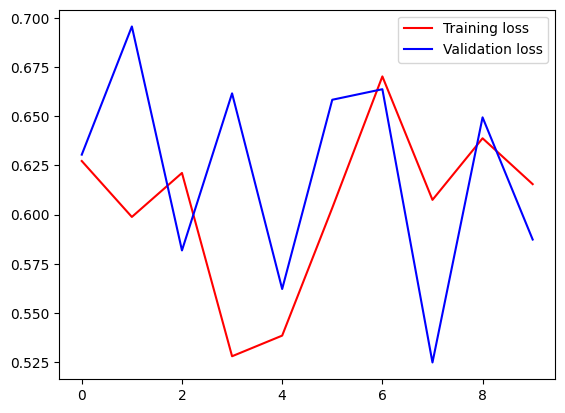

In [31]:
loss=history.history['loss']    
val_loss=history.history['val_loss']
epochs=range(len(loss))
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.legend()
plt.show()

In [35]:
model.save('fake_news_model.keras')